<a href="https://colab.research.google.com/github/Susreesha/ML/blob/main/Regression2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/healthcare_regression_dataset.csv')

In [ ]:
df.head()

,Patient ID,Age,Gender,Type of Surgery,Length of Surgery,Smoking Status,BMI,Blood Pressure Systolic,Blood Pressure Diastolic,Hemoglobin Level,Recovery Time
0,1,62,Male,Uro,9.0,Yes,29.278594,123.495854,69.745782,16.214754,22.0
1,2,65,Male,Gastro,5.0,Yes,31.208965,98.942882,76.920071,14.862318,20.0
2,3,82,Male,Neurological,12.0,No,NaN,127.524227,62.831759,14.151440,29.0
3,4,85,Male,Gastrointestinal,8.0,Yes,27.787986,114.371842,76.831078,11.895807,20.0
4,5,85,Female,Orthopedic,10.0,Yes,31.814226,130.647038,80.005074,11.896937,9.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient ID                1001 non-null   int64  
 1   Age                       1000 non-null   object 
 2   Gender                    1000 non-null   object 
 3   Type of Surgery           1000 non-null   object 
 4   Length of Surgery         999 non-null    float64
 5   Smoking Status            1000 non-null   object 
 6   BMI                       998 non-null    float64
 7   Blood Pressure Systolic   999 non-null    float64
 8   Blood Pressure Diastolic  1000 non-null   float64
 9   Hemoglobin Level          1001 non-null   float64
 10  Recovery Time             999 non-null    float64
dtypes: float64(6), int64(1), object(4)
memory usage: 86.2+ KB


REMOVE DUPLICATE RECORDS

In [ ]:
df.drop_duplicates(subset=['Patient ID'])

,Patient ID,Age,Gender,Type of Surgery,Length of Surgery,Smoking Status,BMI,Blood Pressure Systolic,Blood Pressure Diastolic,Hemoglobin Level,Recovery Time
0,1,62,Male,Uro,9.0,Yes,29.278594,123.495854,69.745782,16.214754,22.0
1,2,65,Male,Gastro,5.0,Yes,31.208965,98.942882,76.920071,14.862318,20.0
2,3,82,Male,Neurological,12.0,No,NaN,127.524227,62.831759,14.151440,29.0
3,4,85,Male,Gastrointestinal,8.0,Yes,27.787986,114.371842,76.831078,11.895807,20.0
4,5,85,Female,Orthopedic,10.0,Yes,31.814226,130.647038,80.005074,11.896937,9.0
...,...,...,...,...,...,...,...,...,...,...,...
996,996,50,Female,Neurological,4.0,No,28.870835,135.467820,91.811219,15.474680,13.0
997,997,46,Female,Orthopedic,4.0,No,34.407077,143.874097,73.086305,12.982254,14.0
998,998,76,Male,Neurological,3.0,No,25.835536,118.227828,70.577272,14.010787,11.0
999,999,84,Female,Cardiac,5.0,No,26.430293,115.129454,107.479142,14.092216,19.0


In [ ]:
df.isnull().sum()

,0
Patient ID,0
Age,1
Gender,1
Type of Surgery,1
Length of Surgery,2
Smoking Status,1
BMI,3
Blood Pressure Systolic,2
Blood Pressure Diastolic,1
Hemoglobin Level,0


In [ ]:
df.dtypes

,0
Patient ID,int64
Age,object
Gender,object
Type of Surgery,object
Length of Surgery,float64
Smoking Status,object
BMI,float64
Blood Pressure Systolic,float64
Blood Pressure Diastolic,float64
Hemoglobin Level,float64


In [ ]:
df = df[df['Age'] != 'a']
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df.head(10)

,Patient ID,Age,Gender,Type of Surgery,Length of Surgery,Smoking Status,BMI,Blood Pressure Systolic,Blood Pressure Diastolic,Hemoglobin Level,Recovery Time
0,1,62.0,Male,Uro,9.0,Yes,29.278594,123.495854,69.745782,16.214754,22.0
1,2,65.0,Male,Gastro,5.0,Yes,31.208965,98.942882,76.920071,14.862318,20.0
2,3,82.0,Male,Neurological,12.0,No,NaN,127.524227,62.831759,14.151440,29.0
3,4,85.0,Male,Gastrointestinal,8.0,Yes,27.787986,114.371842,76.831078,11.895807,20.0
4,5,85.0,Female,Orthopedic,10.0,Yes,31.814226,130.647038,80.005074,11.896937,9.0
5,6,27.0,Male,Urologic,NaN,No,28.107840,NaN,67.299736,14.225886,27.0
6,6,27.0,Male,Urologic,NaN,No,28.107840,NaN,67.299736,14.225886,27.0
7,7,39.0,Male,Cardiac,9.0,No,27.743160,111.254372,95.936289,16.597435,NaN
9,9,88.0,Male,Orthopedic,4.0,Yes,25.520414,126.371878,65.993642,14.420047,15.0
10,10,30.0,Male,Gastrointestinal,3.0,Yes,36.900245,142.570353,88.853351,13.302976,26.0


In [ ]:
df['Age'].unique()

array([ 62.,  65.,  82.,  85.,  27.,  39.,  88.,  30.,  76., 300.,  57.,
        64.,  nan,  43.,  90.,  38.,  87.,  67.,  47.,  37.,  32.,  50.,
        83.,  75.,  49.,  41.,  53.,  73.,  46.,  52.,  18.,  54.,  71.,
        23.,  56.,  35.,  22.,  60.,  19.,  59.,  29.,  86.,  24.,  21.,
        70.,  33.,  31.,  66.,  68.,  28.,  61.,  77.,  20.,  80.,  45.,
        69.,  72.,  74.,  78.,  48.,  42.,  58.,  44.,  84.,  79.,  34.,
        51.,  89.,  36.,  55.,  63.,  26.,  40.,  81.,  25.])

**OUTLIERS**

In [ ]:
import numpy as np
for i in df.select_dtypes(include = np.number).columns[:-1]:

  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]

**REPLACING NULL VALUES**

In [ ]:
for i in df.select_dtypes(include = np.number).columns[:-1]:
 df[i].fillna(df[i].mean(), inplace = True)

<ipython-input-193-1524b6a1803c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mean(), inplace = True)


**REMOVING OUTPUT NULL VALUES**

In [ ]:
df = df.dropna(subset=['Recovery Time'])

**CLEANING CATEGORICAL COLUMNS**

In [ ]:
for i in df.select_dtypes(include='object').columns:
 print(df[i].unique())

['Male' 'Female' nan]
['Uro' 'Gastro' 'Gastrointestinal' 'Orthopedic' nan 'Neurological'
 'Urologic' 'Cardiac']
['Yes' 'No']


In [ ]:
df['Type of Surgery'] = df['Type of Surgery'].replace({'Uro': 'Urologic','Gastro': 'Gastrointestinal'})

In [ ]:
# Renaming columns
df = df.rename(columns={'Patient ID': 'Patient_ID', 'Type of Surgery': 'Type_of_Surgery', 'Length of Surgery': 'Length_of_Surgery', 'Blood Pressure Systolic': 'Blood_Pressure_Systolic',
                        'Blood Pressure Diastolic': 'Blood_Pressure_Diastolic', 'Hemoglobin Level': 'Hemoglobin_Level', 'Smoking Status': 'Smoking_Status',
                        'Recovery Time' : 'Recovery_Time' })

In [ ]:
for i in df.select_dtypes(include='object').columns:
 df[i].fillna(df[i].mode()[0], inplace = True)

<ipython-input-198-ae97157b7ec2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode()[0], inplace = True)


**DUMMIES**

In [ ]:
df = pd.get_dummies(df, columns=['Gender', 'Type_of_Surgery', 'Smoking_Status'])

In [ ]:
df

,Patient_ID,Age,Length_of_Surgery,BMI,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Hemoglobin_Level,Recovery_Time,Gender_Female,Gender_Male,Type_of_Surgery_Cardiac,Type_of_Surgery_Gastrointestinal,Type_of_Surgery_Neurological,Type_of_Surgery_Orthopedic,Type_of_Surgery_Urologic,Smoking_Status_No,Smoking_Status_Yes
0,1,62.0,9.0,29.278594,123.495854,69.745782,16.214754,22.0,False,True,False,False,False,False,True,False,True
1,2,65.0,5.0,31.208965,98.942882,76.920071,14.862318,20.0,False,True,False,True,False,False,False,False,True
3,4,85.0,8.0,27.787986,114.371842,76.831078,11.895807,20.0,False,True,False,True,False,False,False,False,True
4,5,85.0,10.0,31.814226,130.647038,80.005074,11.896937,9.0,True,False,False,False,False,True,False,False,True
9,9,88.0,4.0,25.520414,126.371878,65.993642,14.420047,15.0,False,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,996,50.0,4.0,28.870835,135.467820,91.811219,15.474680,13.0,True,False,False,False,True,False,False,True,False
997,997,46.0,4.0,34.407077,143.874097,73.086305,12.982254,14.0,True,False,False,False,False,True,False,True,False
998,998,76.0,3.0,25.835536,118.227828,70.577272,14.010787,11.0,False,True,False,False,True,False,False,True,False
999,999,84.0,5.0,26.430293,115.129454,107.479142,14.092216,19.0,True,False,True,False,False,False,False,True,False


**NORMALIZATION**

In [ ]:
min_max_values = {}

for i in df.select_dtypes(include = np.number).columns[:-1]:
  min_value = df[i].min()
  max_value = df[i].max()
  df[i] = (df[i] - min_value) / (max_value - min_value)
  min_max_values[i] = (min_value, max_value)

**SAVING TO A JSON FILE**

In [ ]:
import json
with open('min_max_values.json', 'w') as json_file:
  json.dump(min_max_values, json_file)

In [ ]:
df.head()

NameError: name 'df' is not defined

**CORRELATION**

In [ ]:
df.corr()

,Patient_ID,Age,Length_of_Surgery,BMI,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Hemoglobin_Level,Recovery_Time,Gender_Female,Gender_Male,Type_of_Surgery_Cardiac,Type_of_Surgery_Gastrointestinal,Type_of_Surgery_Neurological,Type_of_Surgery_Orthopedic,Type_of_Surgery_Urologic,Smoking_Status_No,Smoking_Status_Yes
Patient_ID,1.000000,-0.035482,-0.033858,-0.008986,0.037626,0.026349,0.056310,-0.029482,-0.019719,0.019719,-0.064365,0.039571,0.050863,-0.019433,-0.009945,0.013874,-0.013874
Age,-0.035482,1.000000,0.027357,-0.021431,-0.020533,-0.006569,-0.044614,-0.012876,0.036111,-0.036111,0.033426,0.022351,-0.044537,0.023602,-0.033406,0.028649,-0.028649
Length_of_Surgery,-0.033858,0.027357,1.000000,-0.010613,0.010919,0.012878,-0.015125,0.047262,-0.057823,0.057823,0.022693,0.025870,0.024191,-0.046822,-0.029012,-0.005018,0.005018
BMI,-0.008986,-0.021431,-0.010613,1.000000,0.019013,-0.003005,-0.038819,0.033088,0.014974,-0.014974,-0.033451,0.032104,-0.040388,-0.001371,0.042367,0.047077,-0.047077
Blood_Pressure_Systolic,0.037626,-0.020533,0.010919,0.019013,1.000000,0.028407,-0.024036,-0.056865,0.007467,-0.007467,-0.085531,-0.028731,0.036546,0.078059,0.002938,-0.015781,0.015781
Blood_Pressure_Diastolic,0.026349,-0.006569,0.012878,-0.003005,0.028407,1.000000,0.018714,-0.006114,0.034829,-0.034829,-0.075507,-0.029196,0.028788,0.020625,0.055990,-0.029676,0.029676
Hemoglobin_Level,0.056310,-0.044614,-0.015125,-0.038819,-0.024036,0.018714,1.000000,-0.014156,-0.037427,0.037427,-0.001990,0.022835,-0.009792,-0.043575,0.029888,-0.042915,0.042915
Recovery_Time,-0.029482,-0.012876,0.047262,0.033088,-0.056865,-0.006114,-0.014156,1.000000,-0.011102,0.011102,-0.033225,-0.061164,0.016492,0.000670,0.078399,0.013837,-0.013837
Gender_Female,-0.019719,0.036111,-0.057823,0.014974,0.007467,0.034829,-0.037427,-0.011102,1.000000,-1.000000,0.036704,-0.032030,0.001916,0.011880,-0.016688,0.021887,-0.021887
Gender_Male,0.019719,-0.036111,0.057823,-0.014974,-0.007467,-0.034829,0.037427,0.011102,-1.000000,1.000000,-0.036704,0.032030,-0.001916,-0.011880,0.016688,-0.021887,0.021887


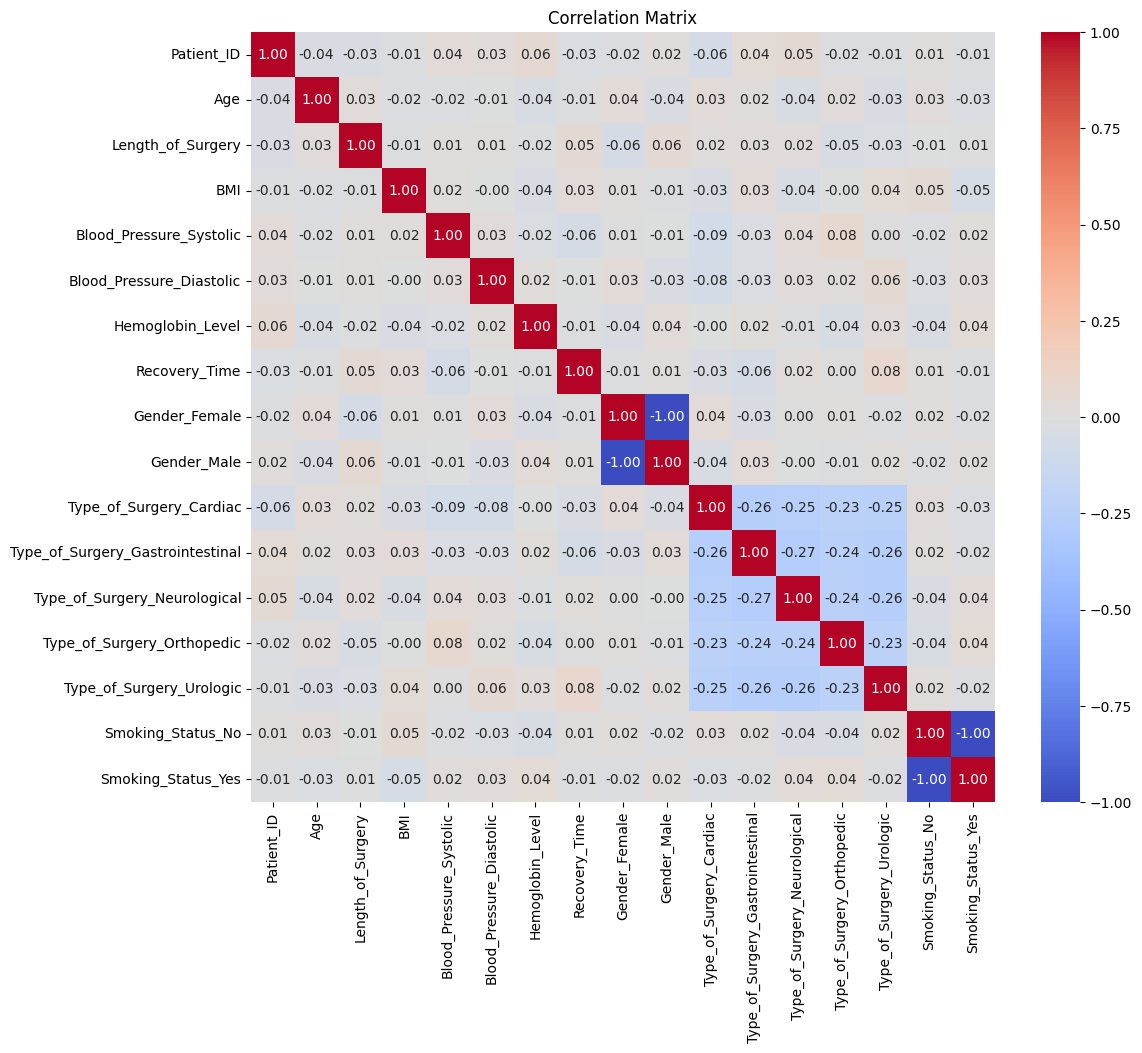

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
Correlation_matrix = df.corr()
sns.heatmap(Correlation_matrix, annot=True, cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**TRAIN TEST SPLIT**

In [ ]:
x = df.drop(columns = ['Recovery_Time', 'Patient_ID', 'Gender_Male', 'Smoking_Status_Yes'], axis = 1)
y = df['Recovery_Time']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("RMSE:", rmse)
print("R2 Score:", r2)

RMSE: 7.473331796424875
R2 Score: -0.0060318186770664806


In [ ]:
pd.DataFrame(x.columns, reg.coef_)

,0
-0.151500,Age
1.306919,Length_of_Surgery
1.460202,BMI
-1.672073,Blood_Pressure_Systolic
-0.649922,Blood_Pressure_Diastolic
-0.143070,Hemoglobin_Level
0.003190,Gender_Female
-0.917488,Type_of_Surgery_Cardiac
-0.529804,Type_of_Surgery_Gastrointestinal
0.133161,Type_of_Surgery_Neurological


In [ ]:
x_test_sample = x_test.iloc[0,:]
x_test_sample_reshaped = np.array(x_test_sample).reshape(1, -1)

In [ ]:
x_test_sample

,292
Age,0.708333
Length_of_Surgery,0.0
BMI,0.404637
Blood_Pressure_Systolic,0.511617
Blood_Pressure_Diastolic,0.277185
Hemoglobin_Level,0.483994
Gender_Female,False
Type_of_Surgery_Cardiac,False
Type_of_Surgery_Gastrointestinal,False
Type_of_Surgery_Neurological,False


In [ ]:
x_test_sample_reshaped

array([[0.7083333333333334, 0.0, 0.4046369711809922, 0.5116169328209719,
        0.2771850464023134, 0.4839944069183882, False, False, False,
        False, False, True, False]], dtype=object)

In [ ]:
y_pred_sample = reg.predict(x_test_sample_reshaped)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
y_pred_sample

array([18.39500539])

In [ ]:
import joblib
joblib.dump(reg, 'linear_regression_model.pk1')

['linear_regression_model.pk1']

**DASHBOARD**

In [ ]:
!pip install streamlit pyngrok

In [ ]:
streamlit_code = """
import streamlit as st
import joblib
import numpy as np
import json

#Load the trained model
model = joblib.load('linear_regression_model.pk1')

#Streamlit App
st.title("Recovery Time Prediction")
st.write("Enter the input values for prediction.")

#Input fields for each feature
Age = st.number_input("Age", min_value=18, max_value=114, step=1, value=65)
BMI = st.number_input("BMI", min_value=15.0, max_value=50.0, step=0.1, value=25.0)
Length_of_Surgery = st.number_input("Length of Surgery", min_value=1.0, max_value=15.0, step=1.0, value=5.0)
Blood_Pressure_Systolic = st.number_input("Blood Pressure Systolic", min_value=90.0, max_value=160.0, step=1.0, value=110.0)
Blood_Pressure_Diastolic = st.number_input("Blood Pressure Diastolic", min_value=60.0, max_value=110.0, step=1.0, value=80.0)
Hemoglobin_Level = st.number_input("Hemoglobin Level", min_value=8.0, max_value=190.0, step=0.1, value=10.0)

#Yes or No
Smoking_Status_No = st.selectbox("Smoker?", options=["No", "Yes"])== "No"

#Categorical fields
Gender_Female = st.selectbox("Gender", options=["Male", "Female"]) == "Female"

#Type of Surgery Selection
Type_of_Surgery = st.selectbox("Type of Surgery", options=["Gastrointestinal", "Orthopedic", "Neurological", "Urologic", "Cardiac"])
Type_of_Surgery_Cardiac = Type_of_Surgery == 'Cardiac'
Type_of_Surgery_Gastrointestinal = Type_of_Surgery == 'Gastrointestinal'
Type_of_Surgery_Neurological = Type_of_Surgery == 'Neurological'
Type_of_Surgery_Orthopedic = Type_of_Surgery == 'Orthopedic'
Type_of_Surgery_Urologic = Type_of_Surgery == 'Urologic'

#Normalization function
def min_max_scale(value, min_val, max_val):
    return (value - min_val) / (max_val - min_val)

#Load Min-Max values from JSON
with open('min_max_values.json', 'r') as json_file:
    min_max_values = json.load(json_file)

#Normalize inputs
Age_norm = min_max_scale(Age, *min_max_values['Age'])
BMI_norm = min_max_scale(BMI, *min_max_values['BMI'])
Length_of_Surgery_norm = min_max_scale(Length_of_Surgery, *min_max_values['Length_of_Surgery'])
Blood_Pressure_Systolic_norm = min_max_scale(Blood_Pressure_Systolic, *min_max_values['Blood_Pressure_Systolic'])
Blood_Pressure_Diastolic_norm = min_max_scale(Blood_Pressure_Diastolic, *min_max_values['Blood_Pressure_Diastolic'])
Hemoglobin_Level_norm = min_max_scale(Hemoglobin_Level, *min_max_values['Hemoglobin_Level'])

#Prepare input data for prediction
input_data = np.array([
  Age_norm, BMI_norm, Length_of_Surgery_norm, Blood_Pressure_Systolic_norm, Blood_Pressure_Diastolic_norm, Hemoglobin_Level_norm, int(Smoking_Status_No),
  int(Gender_Female),int(Type_of_Surgery_Cardiac), int(Type_of_Surgery_Gastrointestinal), int(Type_of_Surgery_Neurological), int(Type_of_Surgery_Orthopedic), int(Type_of_Surgery_Urologic)
]).reshape(1, -1)

#Predict button
if st.button("Recovery Time"):
 prediction = model.predict(input_data)
 st.success(f"Recovery Time: {prediction[0]:,.2f}")

"""

#Save the code to a file
with open ('app.py', 'w') as f:
  f.write(streamlit_code)

In [ ]:
!streamlit run app.py &>/content/logs.txt &

In [ ]:
from pyngrok import ngrok
ngrok.set_auth_token("2tqLvb22MSymOyQ1FsADAQCteZk_4o8ZF8P6iAnUAHipwsLaz")

In [ ]:
from pyngrok import ngrok
# expose the streamlit server running on part 8501
public_url= ngrok.connect(8501)
print(f"Streamlit App is live at:{public_url}")

Streamlit App is live at:NgrokTunnel: "https://65ef-34-48-66-33.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
!pkill -f ngrok

In [ ]:
# prompt: decision tree regressor

from sklearn.tree import DecisionTreeRegressor

# ... (Your existing code) ...

# **Decision Tree Regressor**
dt_regressor = DecisionTreeRegressor(random_state=0)  # Initialize the Decision Tree Regressor
dt_regressor.fit(x_train, y_train)  # Train the model

y_pred_dt = dt_regressor.predict(x_test) # Make predictions using the Decision Tree Regressor
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Regressor:")
print("RMSE:", rmse_dt)
print("R2 Score:", r2_dt)

# Save the Decision Tree model
joblib.dump(dt_regressor, 'decision_tree_model.pk1')



Decision Tree Regressor:
RMSE: 9.805506574556638
R2 Score: -0.7319017806569712


['decision_tree_model.pk1']